**Simple Linear Regression**

#**1) Delivery_time -> Predict delivery time using sorting time**
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import dataset
dataset=pd.read_csv('https://github.com/Rushilrd10/Datasets/files/9776266/delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#Step : 1

Performing EDA on Data

In [ ]:
# renaming columns
dataset1 = dataset.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
dataset1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
# checking datatype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
# checking for null values
dataset.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [ ]:
# checking for duplicate values
dataset[dataset.duplicated()].shape

(0, 2)

In [ ]:
dataset[dataset.duplicated()]

,Delivery Time,Sorting Time


#Step : 2

Plotting the data to check for outliers

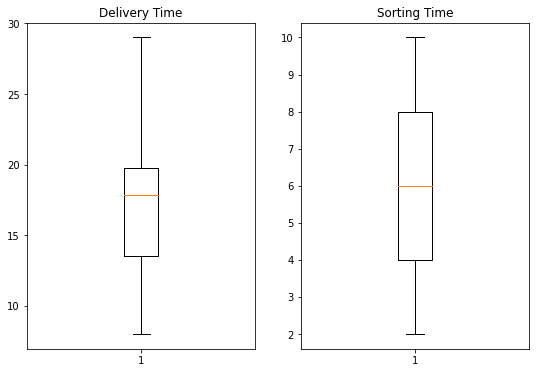

In [ ]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(dataset['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(dataset['Sorting Time'])
plt.title('Sorting Time')
plt.show()

there are no outliers in the data

In [ ]:
# checking the correlation 
dataset.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


Visualization of correlation between x and y

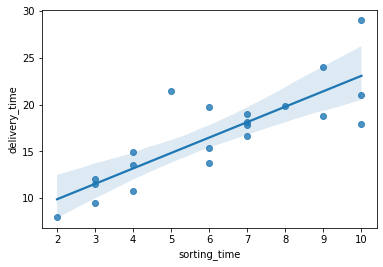

In [ ]:
# regression plot
sns.regplot(x=dataset1['sorting_time'],y=dataset1['delivery_time'])

from this plot we can see that

1.good correlation between the two variables

2.the score is more than 0.8 is good

# Step : 3

Checking for Homoscedasticity or Hetroscedasticity

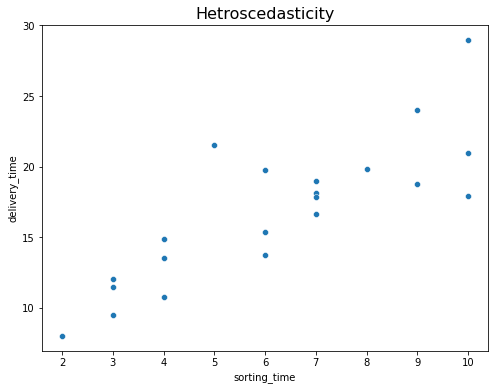

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=dataset1['sorting_time'],y=dataset1['delivery_time'])
plt.title('Hetroscedasticity',fontsize=16)
plt.show()

In [ ]:
dataset.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

the graph shows that

1)It shows that sorting time increases delivery time also increases with 
variation.

2)The data doesn't have any specific pattern in the variation,but the variation is homoscedasticity

#Step : 4

Feature engineering

 Trying different transformation of data to estimate normal distribution and to remove any skewness

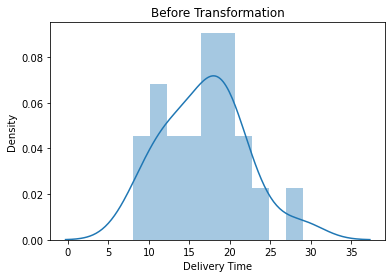

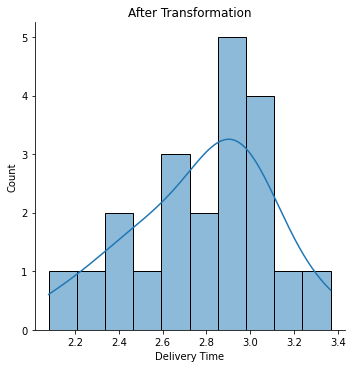

In [ ]:
sns.distplot(dataset['Delivery Time'],bins=10,kde=True)
plt.title('Before Transformation')
sns.displot(np.log(dataset['Delivery Time']),bins=10,kde=True)
plt.title('After Transformation')
plt.show()

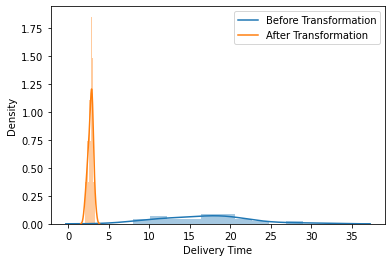

In [ ]:
labels = ['Before Transformation','After Transformation']
sns.distplot(dataset['Delivery Time'],bins=10,kde=True)
sns.distplot(np.log(dataset['Delivery Time']),bins=10,kde=True)
plt.legend(labels)
plt.show()

**We can see here**

log transformation affects the data as it scales the values down

before prediction it is necessary to reverse scaled the values,

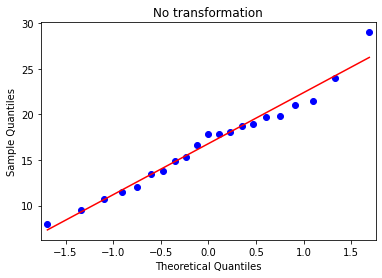

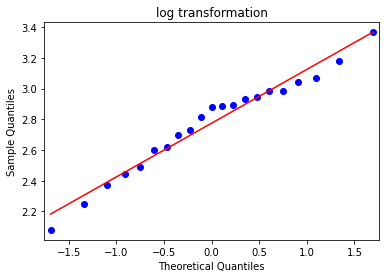

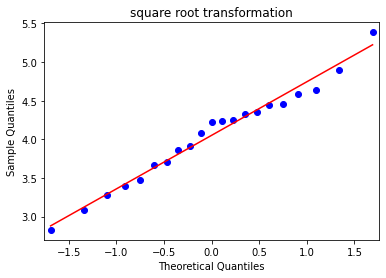

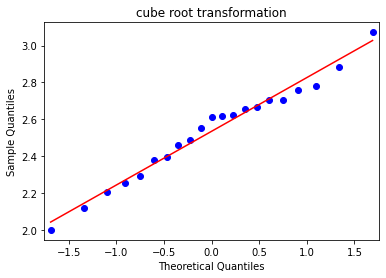

In [ ]:
smf.qqplot(dataset['Delivery Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(dataset['Delivery Time']),line='r')
plt.title('log transformation')
smf.qqplot(np.sqrt(dataset['Delivery Time']),line='r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(dataset['Delivery Time']),line='r')
plt.title('cube root transformation')
plt.show()

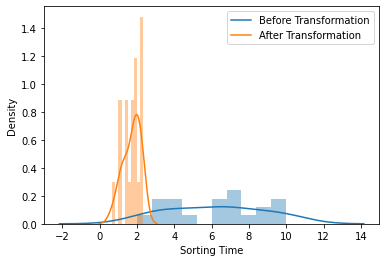

In [ ]:
labels=['Before Transformation','After Transformation']
sns.distplot(dataset['Sorting Time'],bins=10,kde=True)
sns.distplot(np.log(dataset['Sorting Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

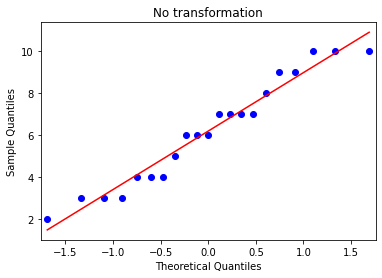

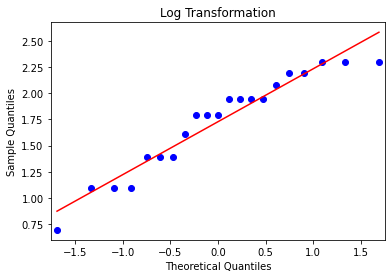

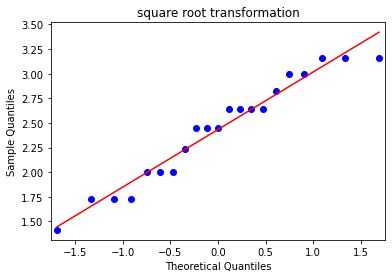

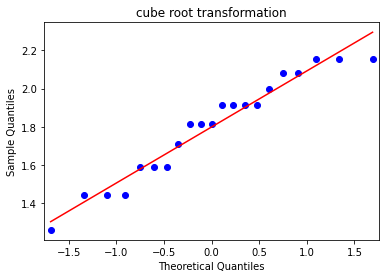

In [ ]:
smf.qqplot(dataset['Sorting Time'],line='r')
plt.title('No transformation')
smf.qqplot(np.log(dataset['Sorting Time']),line='r')
plt.title('Log Transformation')
smf.qqplot(np.sqrt(dataset['Sorting Time']),line='r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(dataset['Sorting Time']),line='r')
plt.title('cube root transformation')
plt.show()

Important Note

we only perform any data transformation when the data is skewed or not normal

Step 5

Fitting a Linear Regression Model

Using Ordinary least squares (OLS) regression

It is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line

In [ ]:
model = sm.ols('delivery_time~sorting_time',data=dataset1).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        12:04:32   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can notice that

the R-squared and Adjusted R-squared scores are still below 0.85. hence try some another transformation to get score higher

Square Root transformation on data

In [ ]:
model1=sm.ols('np.sqrt(delivery_time)~np.sqrt(sorting_time)',data=dataset1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Thu, 13 Oct 2022   Prob (F-statistic):           8.48e-07
Time:                            12:04:58   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can notice in the above model

the R-squared and Adjusted R-squared scores are still below 0.85. hence try some another transformation to get score higher

**Cube Root transformation on Data**

In [ ]:
model2=sm.ols('np.cbrt(delivery_time)~np.cbrt(sorting_time)',data=dataset1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(delivery_time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Thu, 13 Oct 2022   Prob (F-statistic):           4.90e-07
Time:                            12:06:59   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(sorting_time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can notice in the above model

the R-squared and Adjusted R-squared scores are still below 0.85. hence try some another transformation to get score higher

Log transformation on Data

In [ ]:
model3=sm.ols('np.log(delivery_time)~np.log(sorting_time)',data=dataset1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Thu, 13 Oct 2022   Prob (F-statistic):           1.60e-07
Time:                           12:08:53   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can notice in the above model

the R-squared and Adjusted R-squared scores are highest scores than the previous model.hence we consider a good model for prediction.

#Step 6

Model Testing

As Y = Beta0 + Beta1*(X)

Finding Coefficient Parameters (Beta0 and Beta1 values)

In [ ]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

here,intercept(Beta0) value= 6.58

& sorting time(Beta1) value= 1.64

Hypothesis testing of X variable by finding test_stats and P_values for Beta1 i.e if(P_values<0.05; Reject null)

Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

In [ ]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


(Intercept) Beta0: tvalue=3.82 , pvalue=0.001147

(daily) Beta1: tvalue=6.38, pvalue=0.000004

As pvalue(0)<0.05; reject null hyp. thus,X variable(sorting time) has good slope and variance wrt Y variable(Delivery time)

R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.

Measure goodness-of-fit by finding rsquared values (percentage of variance)

In [ ]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

Determination Coefficient = rsquared value = 0.68 ; very good fit >= 85%

Step 7

Residual analysis

Test for Normality of Residuals (qq plot)

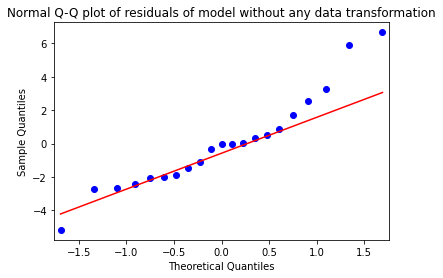

In [ ]:
import statsmodels.api as sm
sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot of residuals of model without any data transformation')
plt.show()

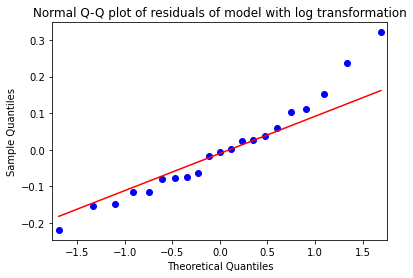

In [ ]:
sm.qqplot(model2.resid, line='q')
plt.title('Normal Q-Q plot of residuals of model with log transformation')
plt.show()

As we can notice in the above plots

1.both the model have slightly different plots

2.the first model is right skewed and doesn't follow normal distribution

3.the second model after log-transformation follows normal distribution with less skewness than first model

**Residual plot to check Homoscedacity or hetroscedacity**

In [ ]:
def get_standardized_values(vals):
  return (vals-vals.mean())/vals.std()

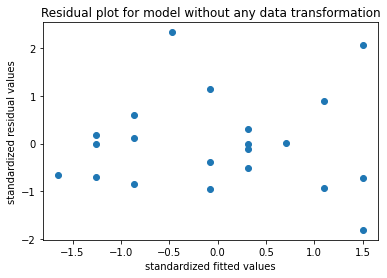

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual plot for model without any data transformation')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

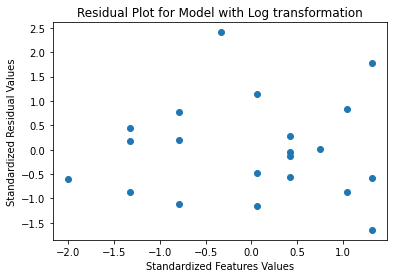

In [ ]:
plt.scatter(get_standardized_values(model2.fittedvalues), get_standardized_values(model2.resid))
plt.title('Residual Plot for Model with Log transformation')
plt.xlabel('Standardized Features Values')
plt.ylabel('Standardized Residual Values')
plt.show()

As we can notice in above plots

1.both the models have homoscedacity

2.the residual and fitted values do not share any pattern

3.hence,there is no relation between the residual and the fitted value. it is randomly distrubed.

#Step 8

Model validation

Comparing different models with respect to their Root Mean Squared Errors

We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
model1_pred_y=np.square(model1.predict(dataset1['sorting_time']))
model2_pred_y=pow(model2.predict(dataset1['sorting_time']),3)
model3_pred_y=np.exp(model3.predict(dataset1['sorting_time']))

In [ ]:
model1_rmse=np.sqrt(mean_squared_error(dataset1['delivery_time'],model1_pred_y))
model2_rmse=np.sqrt(mean_squared_error(dataset1['delivery_time'],model2_pred_y))
model3_rmse=np.sqrt(mean_squared_error(dataset1['delivery_time'],model3_pred_y))
print('model1=',np.sqrt(model.mse_resid),'\n' 'model1=',model1_rmse,'\n' 'model2=',model2_rmse, '\n' 'model3=',model3_rmse)

model1= 2.934903768890139 
model1= 2.762294279320867 
model2= 2.755584309893576 
model3= 2.745828897614548


In [ ]:
data={'model':np.sqrt(model.mse_resid),'model1':model1_rmse,'model2':model3_rmse,'model3':model3_rmse}
min(data,key=data.get)

'model2'

**model2 has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model2 to predict our values**

Model2 is the model where we did log transformation on both dependent variable as well as on independent variable

#Step 9

predicting the values from model with log transformation on the data

In [ ]:
predicted=pd.DataFrame()
predicted['sorting_time']=dataset1.sorting_time
predicted['delivery_time']=dataset1.delivery_time
predicted['predicted_delivery_time']=pd.DataFrame(np.exp(model2.predict(predicted.sorting_time)))
predicted

,sorting_time,delivery_time,predicted_delivery_time
0,10,21.00,17.035997
1,4,13.50,10.547128
2,6,19.75,12.808396
3,9,24.00,15.997918
4,10,29.00,17.035997
5,6,15.35,12.808396
6,7,19.00,13.889274
7,3,9.50,9.328887
8,10,17.90,17.035997
9,9,18.75,15.997918


In [ ]:
predicted1=pd.DataFrame()
predicted1['sorting_time']=dataset1.sorting_time
predicted1['delivery_time']=dataset1.delivery_time
predicted1['predicted_delivery_time']=pd.DataFrame(np.exp(model3.predict(predicted1.sorting_time)))
predicted1

,sorting_time,delivery_time,predicted_delivery_time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


#QUE 2) Salary_hike -> Build a prediction model for Salary_hike
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [ ]:
# impoort libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Step 1

Import data

In [ ]:
# import dataset
dataset=pd.read_csv('https://github.com/Rushilrd10/Datasets/files/9776263/Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


#**Step 2**

performing EDA on data

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
dataset[dataset.duplicated()].shape

(0, 2)

In [ ]:
dataset[dataset.duplicated()]

,YearsExperience,Salary


#**Step 3**

Plotting the data to check for outliers

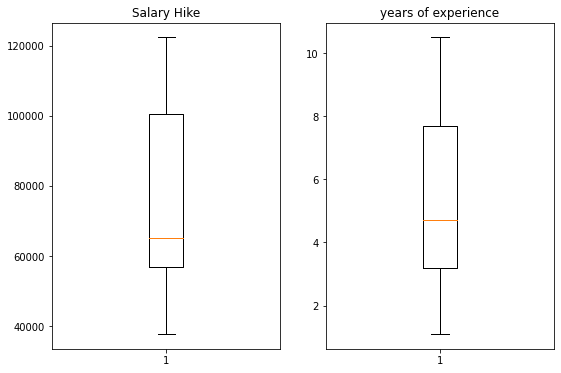

In [ ]:
plt.subplots(figsize=(9,6))
plt.subplot(121)
plt.boxplot(dataset['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(dataset['YearsExperience'])
plt.title('years of experience')
plt.show()

As you can see there are no Outliers in the data

#**Step 4**

Checking for correlation between variables

In [ ]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Visualization of Correlation beteen x and y

regplot = regression plot

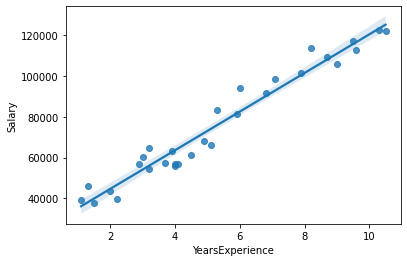

In [ ]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

As you can see above

There is good correlation between the two variable.

The score is more than 0.8 which is a good sign

#**Step 5**

Cheecking for homoscedacity and hetroscedacity

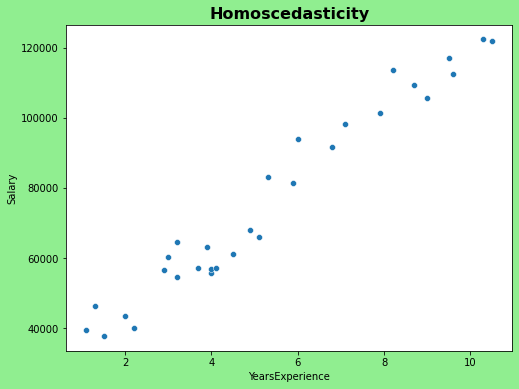

In [ ]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = dataset['YearsExperience'], y = dataset['Salary'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

As you can see in above graph

It shows as the Salary Increases the Years of Experience increases variation is ocnstant along the way in data

The data doesn't have any specific pattern in the variation. hence, we can say it's Homoscedasticity

In [ ]:
dataset.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

#**Step 6**

Feature Engineering

Trying different transformation of data to estimate normal distribution and remove any skewness

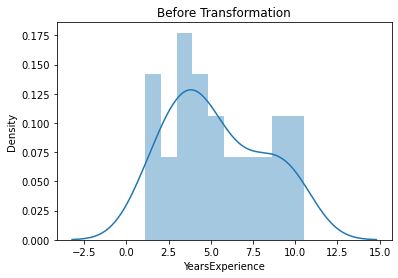

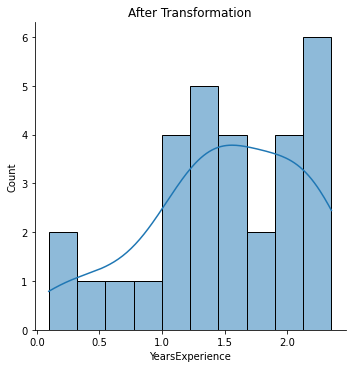

In [ ]:
sns.distplot(dataset['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(dataset['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

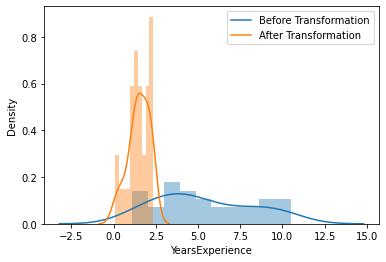

In [ ]:
labels = ['Before Transformation','After Transformation']
sns.distplot(dataset['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(dataset['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

As you can see

How log transformation affects the data and it scales the values down.

Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)

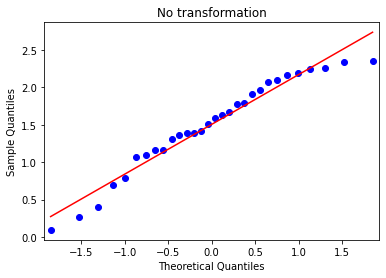

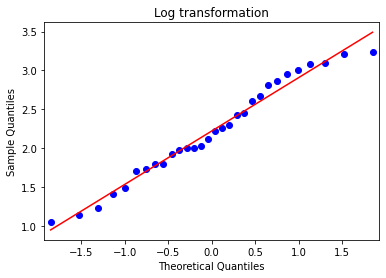

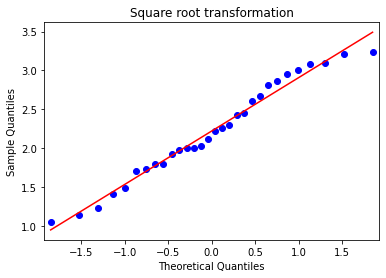

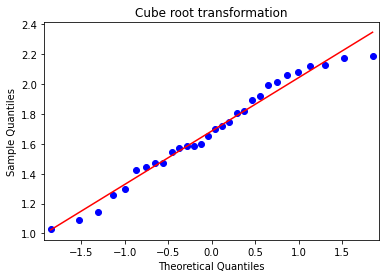

In [ ]:
sm.qqplot(np.log(dataset['YearsExperience']), line = 'r')
plt.title('No transformation')
sm.qqplot(np.sqrt(dataset['YearsExperience']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(dataset['YearsExperience']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(dataset['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

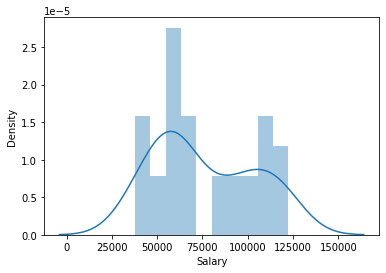

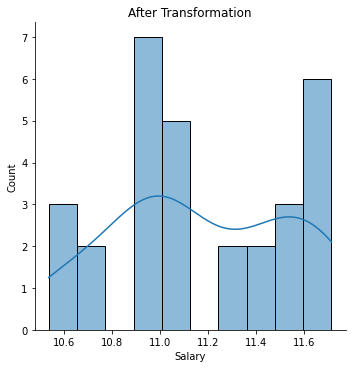

In [ ]:
labels = ['Before Transformation','After Transformation']
sns.distplot(dataset['Salary'], bins = 10, kde = True)
sns.displot(np.log(dataset['Salary']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

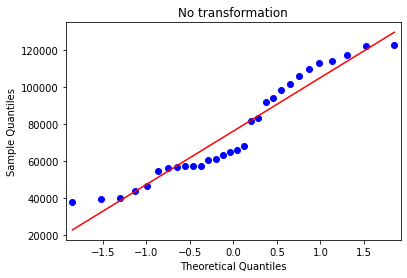

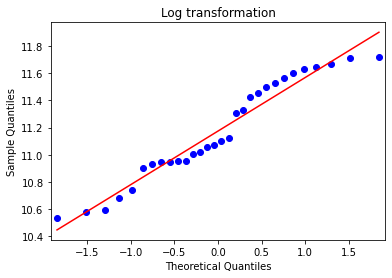

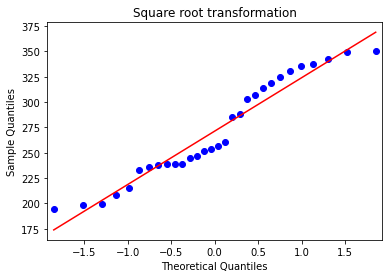

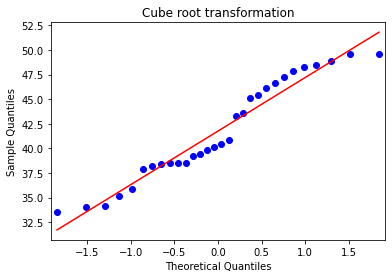

In [ ]:
sm.qqplot(dataset['Salary'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(dataset['Salary']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(dataset['Salary']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(dataset['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

Important Note:

We only Perform any data transformation when the data is skewed or not normal distribution N(0,1)



#**Step 7**

fitting a linear regression model

Using Ordinary least squares (OLS) regression

In [ ]:
model = smf.ols('Salary~YearsExperience',data=dataset).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           1.14e-20
Time:                        12:33:15   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can notice in the above model

The R-squared and Adjusted R-squared scores are above 0.85.

(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)

F-statitics is quite high as well and yes desire it to be higher

But log-likelihood is quite very low far away from 0

and AIC and BIC score are much higher for this model

Lets Try some data transformation to check whether these scores can get any better than this.

**Square Root transformation on data**

In [ ]:
model1=smf.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)',data=dataset).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           7.58e-19
Time:                        12:34:28   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can notice in the above model

The R-squared and Adjusted R-squared scores are above 0.85. but its has gotten less than previous model

(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)

F-statitics has gotten a little lower for this model than previous.

But log-likelihood got better than before close to 0 higher than previous model

and AIC and BIC score are now much better for this model

Lets Try some data transformation to check whether these scores can get any better than thi

**Cuberoot transformation on Data**

In [ ]:
model2=smf.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)',data=dataset).fit()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           6.37e-18
Time:                        12:35:32   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Log transformation on Data**

In [ ]:
model3=smf.ols('np.log(Salary)~np.log(YearsExperience)',data=dataset).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           7.40e-16
Time:                        12:35:56   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#**Step 8**

Model Testing

As Y = Beta0 + Beta1*(X)

Finding Coefficient Parameters (Beta0 and Beta1 values)

In [ ]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

Here, (Intercept) Beta0 value = 25792.20 & (YearsExperience) Beta1 value = 9449.96

Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)

Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

In [ ]:
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


(Intercept) Beta0: tvalue=11.34 , pvalue=5.511950e-12

(daily) Beta1: tvalue=24.95, pvalue= 1.143068e-20

As (pvalue=0)<(α=0.05); Reject Null hyp. Thus, X(YearsExperience) variable has good slope and variance w.r.t Y(Salary) variable.

R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.

Measure goodness-of-fit by finding rsquared values (percentage of variance)

In [ ]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

Determination Coefficient = rsquared value = 0.95 ; very good fit >= 85%

#**Step 9**


Residual Analysis

Test for Normality of Residuals (Q-Q Plot)



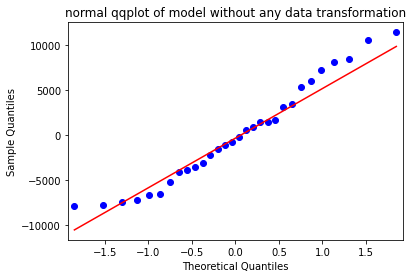

In [ ]:
sm.qqplot(model.resid,line='q')
plt.title('normal qqplot of model without any data transformation')
plt.show()

As you can notice in the above plot

The first model follows normal distribution

**Residual Plot to check Homoscedasticity or Hetroscedasticity**

In [ ]:
def get_standardized_values( vals ):
  return (vals - vals.mean())/vals.std()

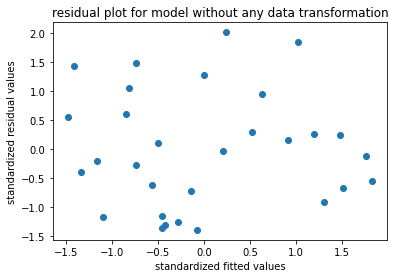

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('residual plot for model without any data transformation')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

As you can notice in the above plots

The Model have Homoscedasciticity.

The Residual(i.e Residual = Actual Value - Predicted Value) and the Fitted values do not share any Pattern.

Hence, there is no relation between the Residual and the Fitted Value. It is Randomly distributed

#**Step 9**

Model Validation

Comparing different models with respect to the Root Mean Squared Errors

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
model1_pred_y =np.square(model1.predict(dataset['YearsExperience']))
model2_pred_y =pow(model2.predict(dataset['YearsExperience']),3)
model3_pred_y =np.exp(model3.predict(dataset['YearsExperience']))

In [ ]:
model1_rmse =np.sqrt(mean_squared_error(dataset['Salary'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(dataset['Salary'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(dataset['Salary'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 5788.315051119395 
model1= 5960.647096174309 
model2= 6232.815455835847 
model3= 7219.716974372806


In [ ]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)

'model'

As model has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model to predict our values

Model is that Simple Linear regression model where we did not perfrom any data transformation and got the highest Adjusted R-squared value

#**Step 10**

predicting values

In [ ]:
# first model results without any transformation
predicted2 = pd.DataFrame()
predicted2['YearsExperience'] = dataset.YearsExperience
predicted2['Salary'] = dataset.Salary
predicted2['Predicted_Salary_Hike'] = pd.DataFrame(model.predict(predicted2.YearsExperience))
predicted2

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
